In [1]:
### This is a gene specific analysis notebook
from candidate_utils import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Gene-transcript dict
dict_name = pickle.load(open(os.path.join(dir_refs,'dict_name_forcov_062121.pkl'), 'rb'))

In [4]:
gene_name = 'TP53I3'

In [5]:
# Find transcript for the gene
for transcript,gene in dict_name.items():
    if gene == gene_name:
        print(transcript)

ENST00000335934


<span style="color:blue">**The histology subtypes of patients with the mutation**</span>.


In [6]:
df_str, df_num = get_num_str(gene_name)

/opt/aci/sw/anaconda3/2020.07_gcc-4.8.5-bzb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (1,17,24,33,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [12]:
df_str

,dcc_specimen_type,histology_tier3,histology_tier4,tumour_histological_type,tumour_stage,tumour_histological_comment,specimen_donor_treatment_type
syn,"{'Primary tumour - solid tissue': 1, 'Primary ...",{'Adenocarcinoma': 3},"{'Pancreatic ductal carcinoma': 2, 'Adenocarci...","{'Infiltrating duct carcinoma, NOS': 2, nan: 1}","{'T3N0MX': 1, nan: 1, 'IB': 1}","{nan: 2, 'WARNING: Tumour histology inferred f...",{'no treatment': 3}
all,"{'Primary tumour - other': 129, 'Primary tumou...",{'Adenocarcinoma': 232},"{'Adenocarcinoma': 60, 'Pancreatic ductal carc...","{nan: 60, 'Infiltrating duct carcinoma, NOS': ...","{nan: 57, 'IIB': 56, 'T2N0MX': 5, 'T1N1bMX': 1...",{'WARNING: Tumour histology inferred from proj...,"{'no treatment': 171, 'surgery': 38, 'chemothe..."


In [8]:
df_num

SV.events  Coding.SNVs  Non.coding.SNVs  \
mut_status                                                   
syn        count    3.000000     3.000000         3.000000   
           mean   156.333333   115.000000     10281.666667   
           std    145.716620    93.402355      7429.134696   
           min     53.000000    27.000000      2660.000000   
           25%     73.000000    66.000000      6671.500000   
           50%     93.000000   105.000000     10683.000000   
           75%    208.000000   159.000000     14092.500000   
           max    323.000000   213.000000     17502.000000   
all        count  230.000000   232.000000       232.000000   
           mean    97.486957    67.004310      6369.357759   
           std     83.570368    46.739908      4927.615216   
           min      0.000000     1.000000       280.000000   
           25%     43.000000    43.000000      3984.000000   
           50%     75.000000    56.000000      4946.000000   
           75%    123.000000    79.250000      7196.250000   
           max    550.000000   525.000000     54929.000000   

                  CNA.events..do_not_use.  Retrotransposon.insertions  \
mut_status                                                              
syn        count                 3.000000                    3.000000   
           mean                401.333333                    2.666667   
           std                 290.358973                    2.081666   
           min                 193.000000                    1.000000   
           25%                 235.500000                    1.500000   
           50%                 278.000000                    2.000000   
           75%                 505.500000                    3.500000   
           max                 733.000000                    5.000000   
all        count               232.000000                  230.000000   
           mean                295.159483                    5.126087   
           std                 172.197876                   17.127488   
           min                  72.000000                    0.000000   
           25%                 176.000000                    0.000000   
           50%                 250.000000                    2.000000   
           75%                 352.250000                    5.000000   
           max                1220.000000                  243.000000   

                  Mitochondrial.mutations    all.Indels  
mut_status                                               
syn        count                 3.000000      3.000000  
           mean                  3.000000   1232.666667  
           std                   3.464102    984.948899  
           min                   1.000000    280.000000  
           25%                   1.000000    725.500000  
           50%                   1.000000   1171.000000  
           75%                   4.000000   1709.000000  
           max                   7.000000   2247.000000  
all        count               232.000000    232.000000  
           mean                  3.426724    745.870690  
           std                   2.428862   1496.372688  
           min                   0.000000     18.000000  
           25%                   2.000000    389.500000  
           50%                   3.000000    528.500000  
           75%                   5.000000    714.000000  
           max                  13.000000  22035.000000

<span style="color:blue">**Mutation**</span>.


In [13]:
df_all, df_mut, donor_list = get_mut(gene_name)

/opt/aci/sw/anaconda3/2020.07_gcc-4.8.5-bzb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (1,17,24,33,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Total 230 patients
3 patients have synonymous mutations, they are: ['DO34680', 'DO221542', 'DO221545']
2:g.24307101C>T
2:g.24307134G>A
2:g.24307122C>T


In [14]:
df_all.loc[pd.IndexSlice[gene_name, :,donor_list],'Genome_Change']

Hugo_Symbol  Variant_Classification  Donor_ID
TP53I3       Silent                  DO34680     g.chr2:24307101C>T
                                     DO221542    g.chr2:24307134G>A
                                     DO221545    g.chr2:24307122C>T
Name: Genome_Change, dtype: object

<span style="color:blue">**CNV**</span>.


In [15]:
cnv = get_cnv(donor_list, gene_name)

                               1168944c-5451-4a18-8758-88bf5723bdd9
Gene Symbol Locus ID Cytoband                                      
TP53I3      9540     2p23.3                                     2.0
                               b8270565-9e02-4d46-9534-08206bfd027a
Gene Symbol Locus ID Cytoband                                      
TP53I3      9540     2p23.3                                     2.0
                               bbdd7393-024b-4073-b5bc-ef7a68c15b8a
Gene Symbol Locus ID Cytoband                                      
TP53I3      9540     2p23.3                                     1.0


<span style="color:blue">**Expression PCAWG**</span>.


/opt/aci/sw/anaconda3/2020.07_gcc-4.8.5-bzb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (1,17,24,33,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Number of normal patient: 0
Number of synonymous patients: 1
Number of other tumor patients:77
test statistic:6.0,p-value:0.0776


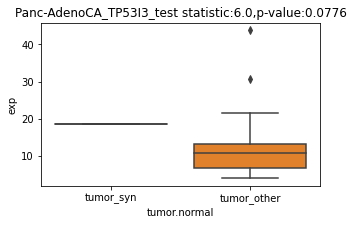

In [16]:
get_expression(gene_name)

<span style="color:blue">**CRISPR**</span>.


In [19]:
get_lineage(gene_name, 'Pancreas')

['Exocrine']


44 in histology subtype
945 not in histology subtype
test statistic:18295.0,    p-value:0.089
test statistic:17573.5,    p-value:0.0412


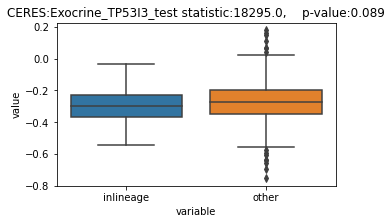

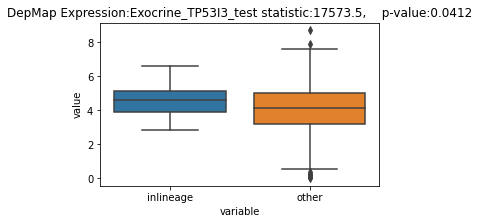

In [20]:
get_CERES(gene_name, 'Exocrine')

<span style="color:blue">**Alternative Splicing**</span>  

In [21]:
dir_splice = '../../anno_ref/ICGC/alternative_splicing'
exp_dir = '../../anno_ref/ICGC/pcawg_rnaseq/'
# Read aliquot id information
df_exp_info = pd.read_csv(os.path.join(exp_dir,'rnaseq.metadata.tsv'), sep = '\t')

In [16]:
### If patient is in the splicing file(transcriptome analysis info)
for donor in donor_list:
    tumor_id = df_exp_info[df_exp_info['icgc_donor_id'] == donor]['aliquot_id']
    if len(tumor_id) ==0:
        print(f'{donor} is not in PCAWG transcriptome analysis')

DO50345 is not in PCAWG transcriptome analysis
DO50326 is not in PCAWG transcriptome analysis
DO50387 is not in PCAWG transcriptome analysis
DO50401 is not in PCAWG transcriptome analysis
DO50337 is not in PCAWG transcriptome analysis
